In [136]:
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, LSTM, Dropout, Conv2D, GlobalMaxPooling2D, MaxPooling2D, Conv1D, GlobalMaxPooling1D, BatchNormalization, Input, Layer, Lambda
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [155]:
# Step 1: Read data from folders 'path1' and 'path2' and create a DataFrame for training
path1 = 'July_Pressure_data'
path2 = 'final_NROIs.csv'

# Function to read data from folder and create DataFrame
def read_data(folder_path, want_all):
    data = []
    if want_all == 0:
      for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Assuming CSV files
        data.append(df)
    else:
      for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        day_file = pd.read_csv(file_path)  # Assuming CSV files
        day_file_filtered = day_file[day_file.iloc[:, -1] != -1]
        data.append(day_file_filtered)
    return pd.concat(data, ignore_index=True)

df1 = read_data(path1, 1)
df2 = pd.read_csv(path2).sample(n=4000)
training_data = pd.concat([df1, df2], ignore_index=True)
# training_data["1802"] = training_data["1802"] 


In [149]:
print(np.unique(training_data["1802"] ))

[-1.  0.  1.  2.]


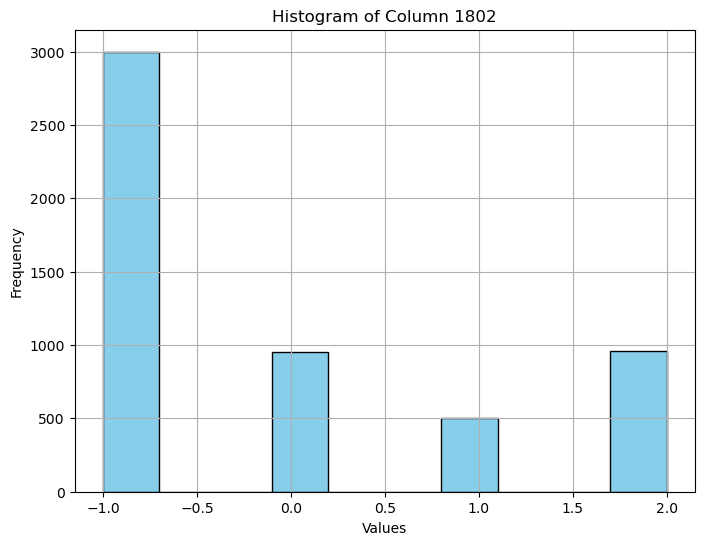

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(training_data['1802'], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Column 1802')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [156]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

# Step 3: Create CNN model
input_shape = (1802, 1)  # Input shape depends on the number of features
num_classes = 4 # Adjust according to your number of classes

# Define the model architecture
cnn_model_15 = Sequential()
cnn_model_15.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(30, 30, 2)))
cnn_model_15.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model_15.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_15.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn_model_15.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_15.add(Flatten())
cnn_model_15.add(Dense(128, activation='relu', kernel_regularizer=l2(0.03)))
cnn_model_15.add(Dropout(0.5))
cnn_model_15.add(Dense(64, activation='relu', kernel_regularizer=l2(0.03)))
cnn_model_15.add(Dropout(0.5))
cnn_model_15.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\kharep\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [157]:
from keras.utils import to_categorical


# Step 5: Evaluate the model's accuracy and generate a confusion matrix
X_train, X_test, y_train, y_test = train_test_split(training_data.drop(columns=['1802', '1801', '1800']), training_data['1802'], test_size=0.2, random_state=42)


# Reshape the input data for CNN
X_train = X_train.values.reshape(X_train.shape[0], 30, 30, 2)
X_test = X_test.values.reshape(X_test.shape[0], 30, 30, 2)

# One-hot encode the target data
num_classes = len(np.unique(y_train))
print(num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
y_train_encoded = to_categorical(y_train, num_classes=num_classes)


early_stopping = EarlyStopping(monitor='loss', patience=50)
cnn_model_15.fit(X_train, y_train_encoded, epochs=250, batch_size=64, callbacks=[early_stopping], validation_data=(X_test, y_test_encoded))






4
Epoch 1/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5755 - loss: 5.5500 - val_accuracy: 0.6643 - val_loss: 1.6536
Epoch 2/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6634 - loss: 1.4624 - val_accuracy: 0.6986 - val_loss: 1.0214
Epoch 3/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6882 - loss: 1.0108 - val_accuracy: 0.6986 - val_loss: 0.8640
Epoch 4/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7105 - loss: 0.8617 - val_accuracy: 0.7118 - val_loss: 0.7866
Epoch 5/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7139 - loss: 0.7932 - val_accuracy: 0.6900 - val_loss: 0.8020
Epoch 6/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7067 - loss: 0.7706 - val_accuracy: 0.7220 - val_loss: 0.7515
Epoch 7/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7154 - loss: 0.7343 - val_accuracy: 0.7064 - val_loss: 0.7455
Epoch 8/250
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7267 - loss: 0.7262 - val_accuracy: 

In [158]:
def preprocess_and_evaluate(folder_path, output_folder, true_output_folder, true_predicted_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    correctly_predicted = []
    # Iterate through files in the folder
    for file_name in os.listdir(folder_path):
        # Read the CSV file
        file_path = os.path.join(folder_path, file_name)
        df_test = pd.read_csv(file_path)

        # Save the '1800' and '1801' columns in a separate variable
        columns_1800_1801 = df_test[['1800', '1801']]

        # Preprocess testing data (Drop columns '1800' and '1801')
        df_test.drop(columns=['1800', '1801'], inplace=True)

        # Extract labels
        y_test_labels = to_categorical(df_test['1802'], num_classes=4)
        
       
        # Reshape the input data for CNN
        X_test_reshaped = df_test.drop(columns=['1802']).values.reshape(-1, 30, 30, 2)

        # Create the scatter plot using OpenCV
        height, width = 70, 125
        
        image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Initialize with white background
        true_image =  np.ones((height, width, 3), dtype=np.uint8) * 255 
        true_predicted = np.ones((height, width, 3), dtype=np.uint8) * 255 
        
        # Get predictions for each sample in X_test_reshaped
        predictions = cnn_model_15.predict(X_test_reshaped)
        predicted_classes = np.argmax(predictions, axis=1)
        i=0
        j=0
        col = 0
        coh = 0
        cl = 0
        p_col = 0
        p_coh = 0
        p_cl = 0
        
        for idx, pred_value in enumerate(predicted_classes):
            j = j+1
            x_coord = int(columns_1800_1801.iloc[idx]['1800'])
            y_coord = int(columns_1800_1801.iloc[idx]['1801'])

            color = None
            true_color = None
            if pred_value == 0:
                color = (0, 0, 255)  # Red COL
                p_col += 1
            elif pred_value == 1:
                color = (0, 255, 0)  # Blue CL
                p_cl +=1
            elif pred_value == 2:
                color = (255, 0, 0)  # Green COH
                p_coh += 1
            else:
                color = (0, 0, 0)  # Nothing  (shouldn't occur based on your code)
            if pred_value<3:
                cv2.circle(image, (x_coord, y_coord), 3, color, -1)
                
            if y_test_labels[idx][0] == 1:
                true_color = (0, 0, 255)
                col += 1
            elif y_test_labels[idx][1] == 1:
                true_color = (0, 255, 0)
                cl += 1
            elif y_test_labels[idx][2] == 1:
                true_color = (255, 0, 0) 
                coh += 1
            else:
                true_color = (0, 0, 0)  # Nothing  (shouldn't occur based on your code)
            if y_test_labels[idx][3]!=1:
                cv2.circle(true_image, (x_coord, y_coord), 3, true_color, -1)
            if true_color == color:
                i=i+1
                if pred_value<3:
                    cv2.circle(true_predicted, (x_coord, y_coord), 3, color, -1)
        dict = {}
        dict['Day'] = file_name[:-4]
        dict['Accuracy'] = i/j*100
        dict['True_COL'] = col
        dict['True_CL'] = cl
        dict['True_COH'] = coh
        dict['Predicted_COL'] = p_col
        dict['Predicted_CL'] = p_cl
        dict['Predicted_COH'] = p_coh
        correctly_predicted.append(dict)
    
        # Save the predicted image
        output_file_path = os.path.join(output_folder, f'predicted_{file_name[:-4]}.png')
        true_output_file_path = os.path.join(true_output_folder, f'true_{file_name[:-4]}.png')
        true_predicted_file_path = os.path.join(true_predicted_folder, f'true_{file_name[:-4]}.png')
        cv2.imwrite(output_file_path, image)
        cv2.imwrite(true_output_file_path, true_image)
        cv2.imwrite(true_predicted_file_path, true_predicted)
        
    return correctly_predicted


# Example usage:
folder_path = 'July_Pressure_data_testing'
output_folder = '4x_NROI/Predicted_images'
true_output_folder = '4x_NROI/true_images'
true_predicted_folder = '4x_NROI/true_prediction'
correctly_predicted = preprocess_and_evaluate(folder_path, output_folder, true_output_folder, true_predicted_folder)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
111/111 ━━━━━━━━

In [159]:
df = pd.DataFrame(correctly_predicted)
# Save DataFrame to CSV file
df.to_csv('4x_NROI/Accuracy_per_day_cnn.csv', index=False)